In [1]:
import tensorflow as tf
import numpy as np
from ptr_decoder import pointer_decoder
from pointer_network import PointerNetwork
from data_generator import *
%load_ext autoreload
%autoreload 2

In [2]:
input_dim = 1
batch_size = 32
seq_len = 8
hidden_dim = 128
lr = 0.01
sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))

In [3]:
pointer_net = PointerNetwork(hidden_dim, lr, 10, sort, 
                             max_seq_len=seq_len, batch_size=batch_size, input_dim=1)

In [ ]:
pointer_net.train(sess, print_every=50)

------------------Testing-------------------
Epoch 0:
Sample:
ground truth: [ 0.04019927  0.06430691  0.22457752  0.56303015  0.64774744  0.70851185
  0.79847057  0.85636531]
prediction [ 0.22457752  0.22457752  0.22457752  0.22457752  0.22457752  0.22457752
  0.22457752  0.22457752]
Test loss is 18.1174
Test accuracy is 0.0
--------------------Done--------------------
Epoch 0: training loss is 17.9078
Epoch 50: training loss is 15.1607
------------------Testing-------------------
Epoch 100:
Sample:
ground truth: [ 0.5252165   0.59039069  0.73010986  0.7428869   0.7490249   0.78165124
  0.82920861  0.97163153]
prediction [ 0.5252165   0.5252165   0.5252165   0.7490249   0.97163153  0.97163153
  0.97163153  0.97163153]
Test loss is 11.4928
Test accuracy is 0.0
--------------------Done--------------------
Epoch 100: training loss is 11.4639
Epoch 150: training loss is 8.80549
------------------Testing-------------------
Epoch 200:
Sample:
ground truth: [ 0.12432993  0.21550984  0.3803491

In [41]:
import itertools
from matplotlib import pyplot as plt
%matplotlib inline

In [27]:
def length(x, y):
    return np.linalg.norm(np.asarray(x) - np.asarray(y))

In [60]:
def solve_tsp_dynamic(points):
    # calc all lengths
    all_distances = [[length(x, y) for y in points] for x in points]
    # initial value - just distance from 0 to every other point + keep the track of edges
    A = {(frozenset([0, idx + 1]), idx + 1): (dist, [0, idx + 1]) for idx, dist in enumerate(all_distances[0][1:])}
    cnt = len(points)
    for m in range(2, cnt):
        B = {}
        for S in [frozenset(C) | {0} for C in itertools.combinations(range(1, cnt), m)]:
            for j in S - {0}:
                # this will use 0th index of tuple for ordering, the same as if key=itemgetter(0) used
                B[(S, j)] = min([(A[(S - {j}, k)][0] + all_distances[k][j], A[(S - {j}, k)][1] + [j])
                                 for k in S if k != 0 and k != j])
        A = B
    res = min([(A[d][0] + all_distances[0][d[1]], A[d][1]) for d in iter(A)])
    rres = res[1]
    # rres.append(0)
    rres = np.asarray(rres)
    return rres

In [63]:
nodes = np.random.random(size=(5, 2))

In [64]:
solve_tsp_dynamic(nodes)

[[0.0, 0.25865835743826232, 0.46144456844717519, 0.6995954244319661, 0.77011921536157579], [0.25865835743826232, 0.0, 0.20694693216422411, 0.93006376984076411, 0.81963941593632372], [0.46144456844717519, 0.20694693216422411, 0.0, 1.0995023274576792, 0.86151055829477785], [0.6995954244319661, 0.93006376984076411, 1.0995023274576792, 0.0, 0.70211444752843966], [0.77011921536157579, 0.81963941593632372, 0.86151055829477785, 0.70211444752843966, 0.0]]


array([0, 3, 4, 2, 1])

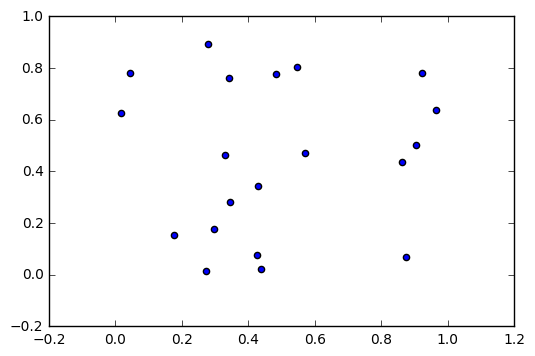

In [59]:
plt.scatter(nodes[:, ::2], nodes[:, 1::2])

In [11]:
sort.__name__

'sort'